In [81]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split


review_data = load_files(r"/content/drive/My Drive/AssignmentFolder/Assignment11/movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

#re : regular expression
#lematize : 근본적인 의미 (root meaning) - 형태소분석
#CountVectorizer : 워드의 vector화
#min : 빈도수 5개 이하 인거 제외 max : 70%이상의 빈도수로 출현한거 제외
#X : feature가 vector로 표현된것
#


#TfidTransformer : score구하는것

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(X_train)
print(y_train)
print(y_test)

#train_set : 1400
#test_set : 600

(1400, 1500)
(1400,)
(600, 1500)
(600,)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.07349223 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0 1 1 ... 0 1 1]
[1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1
 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1
 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0

In [0]:
#save train_set
np.save('./drive/My Drive/AssignmentFolder/Assignment11/X_train', X_train)
np.save('./drive/My Drive/AssignmentFolder/Assignment11/X_test', X_test)
np.save('./drive/My Drive/AssignmentFolder/Assignment11/y_train', y_train)
np.save('./drive/My Drive/AssignmentFolder/Assignment11/y_test', y_test)


In [0]:
#load save result

X_train = np.load('./drive/My Drive/AssignmentFolder/Assignment11/X_train.npy')
X_test = np.load('./drive/My Drive/AssignmentFolder/Assignment11/X_test.npy')
y_train = np.load('./drive/My Drive/AssignmentFolder/Assignment11/y_train.npy')
y_test = np.load('./drive/My Drive/AssignmentFolder/Assignment11/y_test.npy')


In [0]:
#classify
#classifier = train_classifier(X_train, y_train)
#y_pred_test = classifier.predict(X_test)
#y_pred_train = classifier.predict(X_train)


In [0]:
np.random.seed(1020)

#np.random.randn : mean = 0, deriviation = 1인 random값
u = np.random.normal(loc = 0, scale = 0.3, size = (1501, 1001))
v = np.random.normal(loc = 0, scale = 0.3, size = (1001, 501))
w = np.random.normal(loc = 0, scale = 0.3, size = (501, 101))
q = np.random.normal(loc = 0, scale = 0.3, size = (101, 2))
#randn은 너무 범위가 넓어서 이번에는 사용이 어려움
#u = np.random.randn(1501, 1001)
#v = np.random.randn(1001, 501)
#w = np.random.randn(501, 101)
#q = np.random.randn(101, 2)


#train
#(1500, 1)
X = []
#(1000, 1)
Y = []
#(500, 1)
Z = []
#(100, 1)
H = []
#(2, 1)
T = []

#test
#(1500,1)
x = []
#(1000,1)
y = []
#(500,1)
z = []
#(100,1)
h = []
#(2,1)
t = []

#bias
bias = 1


In [184]:
!curl https://colab.chainer.org/install | sh -
#cupy library를 사용하기 위해 사용

import cupy as cp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0   3717      0 --:--:-- --:--:-- --:--:--  3717
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
+ pip install -q cupy-cuda100  chainer 
+ set +ex
Installation succeeded!


In [185]:
#뒤집지 않은거

#상수
iter = 0
#if learning rate is too small
#optimizing is not will be enough
learning_rate = 0.7
#lambda / 2n
lmbd = 0.00000000001

train_loss_list = []
test_loss_list = []

#accuracy
train_accuracy_list = []
test_accuracy_list = []
train_correct = 0
test_correct = 0

threshold = 0.00005
#correct / miss list
correct_label = []
correct_image = []
miss_label = []
miss_image = []
#to use convergence append 0
train_loss_list.append(0)

def sigmoid (z):
    return 1 / (1 + np.exp(-z))
 
def sig_der(z):
    return (z*(1-z))

while iter < 100:
  for i in range(0, 1400):
    #training input
    
    X = X_train[i]
    X = np.hstack([X, bias])
    Y = sigmoid(cp.dot(X, u))
    Z = sigmoid(cp.dot(Y, v))
    H = sigmoid(cp.dot(Z, w))
    T = sigmoid(cp.dot(H, q))

    R = np.zeros(2)
    R[y_train[i]] = 1.0
    #-값을 가지기도 해서 graph상에 표시할 때는 abs값 적용

    T_loss = T - R
    training_loss = np.abs(T_loss) + lmbd * (np.sum(u ** 2) + np.sum(v ** 2) + np.sum(w ** 2) + np.sum(q ** 2))
    #to use backpropagation
    #bias는 어차피 1이므로 신경쓰지 않아도 된다

    T_der = T_loss * sig_der(T)

    H_loss = cp.dot(T_der, q.T)
    H_der = H_loss * sig_der(H)

    Z_loss = cp.dot(H_der, w.T)
    Z_der = Z_loss * sig_der(Z)

    Y_loss = cp.dot(Z_der, v.T)
    Y_der = Y_loss * sig_der(Y)

    tmpq = q - learning_rate * (cp.reshape(H, (-1,1)) * T_der + lmbd * q) 
    tmpw = w - learning_rate * (cp.reshape(Z, (-1,1)) * H_der + lmbd * w)
    tmpv = v - learning_rate * (cp.reshape(Y, (-1,1)) * Z_der + lmbd * v)
    tmpu = u - learning_rate * (cp.reshape(X, (-1,1)) * Y_der + lmbd * u)
      
    q = tmpq
    w = tmpw
    v = tmpv
    u = tmpu

    if T.argmax(axis = 0) == y_train[i]:
      train_correct += 1
    
    #test
    if i < 600:
      x = X_test[i]
      x = np.hstack([x, bias])
      y = sigmoid(cp.dot(x, u))
      z = sigmoid(cp.dot(y, v))
      h = sigmoid(cp.dot(z, w))
      t = sigmoid(cp.dot(h, q))
        
      r = np.zeros(2)
      r[y_test[i]] = 1.0
      t_loss = t - r
      testing_loss = np.abs(t_loss) + lmbd * (np.sum(u ** 2) + np.sum(v ** 2) + np.sum(w ** 2) + np.sum(q ** 2))
      if t.argmax(axis = 0) == y_test[i]:    
        test_correct += 1


  #loss check
  #절댓값으로구해 음수일때 -로 가서 헷갈리는 그래프를 만들지 않도록 함
  train_loss_list.append(np.mean(np.abs(training_loss)))
  test_loss_list.append(np.mean(np.abs(testing_loss)))
  #accuracy check
  train_accuracy_list.append(train_correct / 1400)
  test_accuracy_list.append(test_correct / 600)

  print(iter)
  print("train loss : ", np.mean(training_loss), "train accuracy : ", train_correct / 1400)
  print("test loss : ", np.mean(testing_loss), "test accuracy : ", test_correct / 600)

  #converge check
  if abs(train_loss_list[iter] - train_loss_list[iter + 1]) < threshold:
    print("iter : ", iter)
    print("converge")
    break

  train_correct = 0
  test_correct = 0
  iter += 1

#delete 0
del train_loss_list[0]

0
train loss :  0.29729191257154625 train accuracy :  0.49642857142857144
test loss :  0.22004313300122832 test accuracy :  0.5183333333333333
1
train loss :  0.37069587949399374 train accuracy :  0.4928571428571429
test loss :  0.2880088987997207 test accuracy :  0.5316666666666666
2
train loss :  0.39956389259827907 train accuracy :  0.48714285714285716
test loss :  0.3612817061223735 test accuracy :  0.525
3
train loss :  0.48043525572414 train accuracy :  0.5264285714285715
test loss :  0.48569373285478257 test accuracy :  0.5566666666666666
4
train loss :  0.4708964197655172 train accuracy :  0.5357142857142857
test loss :  0.48109066526663635 test accuracy :  0.5616666666666666
5
train loss :  0.4679280313096057 train accuracy :  0.5457142857142857
test loss :  0.4737442164347093 test accuracy :  0.56
6
train loss :  0.4565380785639641 train accuracy :  0.55
test loss :  0.4641553584570091 test accuracy :  0.58
7
train loss :  0.4434394502688769 train accuracy :  0.56714285714285

In [0]:
#상수
iter = 0
#if learning rate is too small
#optimizing is not will be enough
learning_rate = 0.7
#lambda / 2n
lmbd = 0.000000001

train_loss_list = []
test_loss_list = []

#accuracy
train_accuracy_list = []
test_accuracy_list = []
train_correct = 0
test_correct = 0

threshold = 0.00001
#correct / miss list
correct_label = []
correct_image = []
miss_label = []
miss_image = []
#to use convergence append 0
train_loss_list.append(0)

def sigmoid (z):
    return 1 / (1 + np.exp(-z))
 
def sig_der(z):
    return (z*(1-z))

while iter < 10:
  for i in range(0, 1400):
    #training input
    
    X = X_train[0:, i:i+1]
    X = np.vstack([X, bias])
    Y = sigmoid(cp.dot(u, X))
    Z = sigmoid(cp.dot(v, Y))
    H = sigmoid(cp.dot(w, Z))
    T = sigmoid(cp.dot(q, H))

    R = np.zeros((2,1))
    R[y_train[i]] = 1.0
    #-값을 가지기도 해서 graph상에 표시할 때는 abs값 적용

    T_loss = T - R 
    training_loss = T_loss ** 2 + lmbd * (np.sum(u ** 2) + np.sum(v ** 2) + np.sum(w ** 2) + np.sum(q ** 2))
    #to use backpropagation
    #bias는 어차피 1이므로 신경쓰지 않아도 된다

    T_der = T_loss * sig_der(T)

    H_loss = cp.dot(q.T, T_der)
    H_der = H_loss * sig_der(H)

    Z_loss = cp.dot(w.T, H_der)
    Z_der = Z_loss * sig_der(Z)

    Y_loss = cp.dot(v.T, Z_der)
    Y_der = Y_loss * sig_der(Y)

    tmpq = q - learning_rate * (H.T * T_der + lmbd * q) 
    tmpw = w - learning_rate * (Z.T * H_der + lmbd * w)
    tmpv = v - learning_rate * (Y.T * Z_der + lmbd * v)
    tmpu = u - learning_rate * (X.T * Y_der + lmbd * u)
      
    q = tmpq
    w = tmpw
    v = tmpv
    u = tmpu

    if T.argmax() == y_train[i]:
      train_correct += 1
      correct_label.append(T.argmax())
      correct_image.append(X_train[0:, i:i+1])
    else:
      miss_label.append(T.argmax())
      miss_image.append(X_train[0:, i:i+1])
    #test
    #if i < 600:
    #  x = X_test[0:, i: (i+1)]
    #  x = np.vstack([x, bias])
    #  y = sigmoid(cp.dot(u, x))
    #  z = sigmoid(cp.dot(v, y))
    #  h = sigmoid(cp.dot(w, z))
    #  t = sigmoid(cp.dot(q, h))
        
    #  r = np.zeros((2,1))
    #  r[y_test[i]] = 1.0
    #  t_loss = t - r
   #   testing_loss = t_loss ** 2 + lmbd * (np.sum(u ** 2) + np.sum(v ** 2) + np.sum(w ** 2) + np.sum(q ** 2))
   #   if t.argmax() == y_test[i]:
          
   #     test_correct += 1


  #loss check
  train_loss_list.append(np.mean(np.abs(training_loss)))
  #test_loss_list.append(np.mean(np.abs(testing_loss)))
  #accuracy check
  train_accuracy_list.append(train_correct / 1400)
  #test_accuracy_list.append(test_correct / 600)

  print(iter)
  print("train loss : ", np.mean(training_loss), "train accuracy : ", train_correct / 1400)
  #print("test loss : ", np.mean(testing_loss), "test accuracy : ", test_correct / 600)

  #converge check
  if abs(train_loss_list[iter] - train_loss_list[iter + 1]) < threshold:
    print("iter : ", iter)
    print("converge")
    break

  train_correct = 0
  test_correct = 0
  iter += 1

#delete 0
del train_loss_list[0]

In [0]:
import matplotlib.pyplot as plt

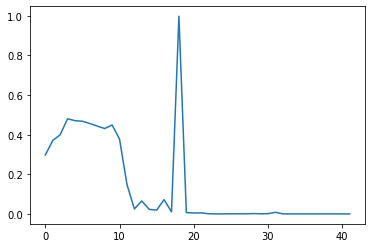

In [186]:
plt.plot(train_loss_list)
plt.show()

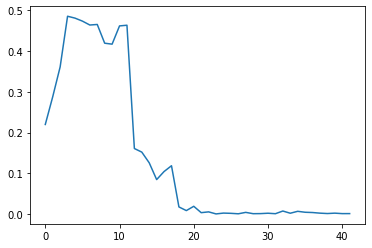

In [191]:
plt.plot(test_loss_list)
plt.show()

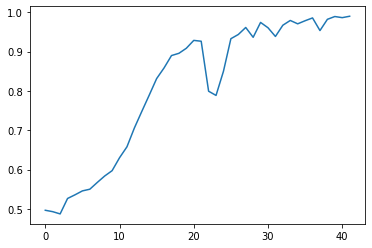

In [194]:
plt.plot(train_accuracy_list)
plt.show()

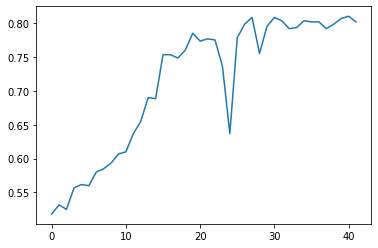

In [189]:
plt.plot(test_accuracy_list)
plt.show()

In [0]:
bias = 1
np.random.seed(4637)
# using normal distribution with mean 0 and stardard deviation for theta init
theta_u = np.random.normal(loc = 0.0, scale = 0.5, size = (1501, 513))

theta_v = np.random.normal(loc = 0.0, scale = 0.5, size = (513, 193))

theta_x = np.random.normal(loc = 0.0, scale = 0.5, size = (193, 97))

theta_w = np.random.normal(loc = 0.0, scale = 0.5, size = (97, 2))

input_layer = np.zeros((1, 1500))

hidden_layer1 = np.zeros((1,512))

hidden_layer2 = np.zeros((1,192))

hidden_layer3 = np.zeros((1,96))

output_layer = np.zeros((1,2))


In [116]:
bias = 1
np.random.seed(4637)
# using normal distribution with mean 0 and stardard deviation for theta init
theta_u = np.random.normal(loc = 0.0, scale = 0.5, size = (1501, 513))

theta_v = np.random.normal(loc = 0.0, scale = 0.5, size = (513, 193))

theta_x = np.random.normal(loc = 0.0, scale = 0.5, size = (193, 97))

theta_w = np.random.normal(loc = 0.0, scale = 0.5, size = (97, 2))

input_layer = np.zeros((1, 1500))

hidden_layer1 = np.zeros((1,512))

hidden_layer2 = np.zeros((1,192))

hidden_layer3 = np.zeros((1,96))

output_layer = np.zeros((1,2))

cycle = 150
learning_rate = 0.8

train_history = np.zeros(cycle)
test_history = np.zeros(cycle)

train_accuracy = np.zeros(cycle)
test_accuracy = np.zeros(cycle)

y_pred_train = np.zeros(len(y_train))
y_pred_test = np.zeros(len(y_test))

train_correct = 0
train_incorrect = 0

test_correct = 0
test_incorrect = 0

lambda_val = 0.00000000001

for j in range(cycle):

  for i in range(len(X_train)):

    input_layer = X_train[i]
    input_layer = np.insert(input_layer, 0, bias, axis = 0)
    hidden_layer1 = np.insert(hidden_layer1, 0, bias, axis = 0)
    hidden_layer1 = sigmoid(cp.dot(input_layer, theta_u))
    hidden_layer2 = np.insert(hidden_layer2, 0, bias, axis= 0 )
    hidden_layer2 = sigmoid(cp.dot(hidden_layer1, theta_v))
    hidden_layer3 = np.insert(hidden_layer2, 0, bias, axis = 0)
    hidden_layer3 = sigmoid(cp.dot(hidden_layer2, theta_x))

    output_layer = sigmoid(cp.dot(hidden_layer3, theta_w))


    r = np.zeros(2)
    r[y_train[i]] = 1.0

    output_layer_error = (output_layer - r) + (lambda_val / 8) * (cp.sum(theta_u ** 2) + cp.sum(theta_v ** 2) + cp.sum(theta_x ** 2) + cp.sum(theta_w ** 2))
    output_layer_delta = output_layer_error * sig_der(output_layer)


    hidden_layer3_error = output_layer_delta.dot(theta_w.T)
    hidden_layer3_delta = hidden_layer3_error * sig_der(hidden_layer3)

    hidden_layer2_error = hidden_layer3_delta.dot(theta_x.T)
    hidden_layer2_delta = hidden_layer2_error * sig_der(hidden_layer2)

    hidden_layer1_error = hidden_layer2_delta.dot(theta_v.T)
    hidden_layer1_delta = hidden_layer1_error * sig_der(hidden_layer1)

    theta_w -= learning_rate * (cp.reshape(hidden_layer3, (-1,1)) * output_layer_delta + lambda_val * theta_w)
    theta_x -= learning_rate * (cp.reshape(hidden_layer2, (-1,1)) * hidden_layer3_delta + lambda_val * theta_x)
    theta_v -= learning_rate * (cp.reshape(hidden_layer1, (-1,1)) * hidden_layer2_delta + lambda_val * theta_v)
    theta_u -= learning_rate * (cp.reshape(input_layer, (-1,1)) * hidden_layer1_delta + lambda_val * theta_u)

    if output_layer.argmax(axis = 0) == y_train[i]:
      train_correct += 1
    else:
      train_incorrect += 1

    y_pred_train[i] = output_layer.argmax(axis = 0)

  train_accuracy[j] = train_correct / len(X_train)
  train_history[j] = np.mean(np.abs(output_layer_error))
  print(j, "iter")
  print("training error : ", train_history[j], "accuracy : ", round(train_accuracy[j] * 100, 2))

  train_correct = 0
  train_incorrect = 0

0 iter
training error :  0.18118241108794536 accuracy :  48.64
1 iter
training error :  0.2527245895809184 accuracy :  50.29
2 iter
training error :  0.37278605497072304 accuracy :  51.29
3 iter
training error :  0.3932226118867172 accuracy :  52.57
4 iter
training error :  0.4353555734417318 accuracy :  58.57
5 iter
training error :  0.3165435416925734 accuracy :  64.07
6 iter
training error :  0.19908107155323124 accuracy :  72.36
7 iter
training error :  0.02026031210253286 accuracy :  79.36
8 iter
training error :  0.008117950239289138 accuracy :  82.57
9 iter
training error :  0.0419110922939684 accuracy :  85.79
10 iter
training error :  0.007676630541281238 accuracy :  89.36
11 iter
training error :  0.012150200945338686 accuracy :  91.93
12 iter
training error :  0.004566205911849922 accuracy :  92.14
13 iter
training error :  0.0028106386820400922 accuracy :  92.93
14 iter
training error :  0.0006626454147441393 accuracy :  95.0
15 iter
training error :  0.07385919830229543 ac

KeyboardInterrupt: ignored